**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [19]:
import pandas as p

# import data 2C_weka.csv for 2 Class Classifcation.


In [54]:
d=p.read_csv('2Classdata.csv')

In [4]:
d.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


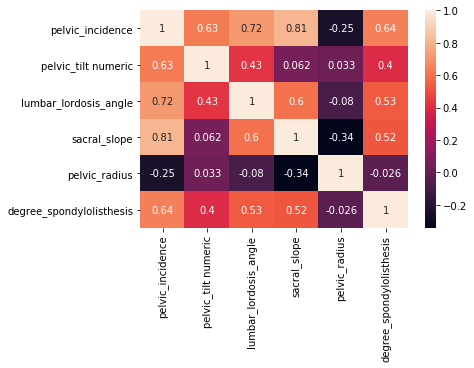

In [7]:
s.heatmap(d.corr(),annot=True)

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [4]:
d.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
d.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [6]:
d.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [7]:
print('no missing value')

no missing value


In [55]:
d.rename(columns={'class':'clas'},inplace=True)

In [69]:
d.clas.unique()

array(['Abnormal', 'Normal'], dtype=object)

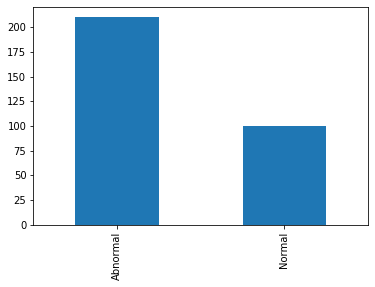

In [123]:
d['clas'].value_counts().plot(kind='bar')
pl.show()

In [124]:
print('normal class is under represented')

normal class is under represented


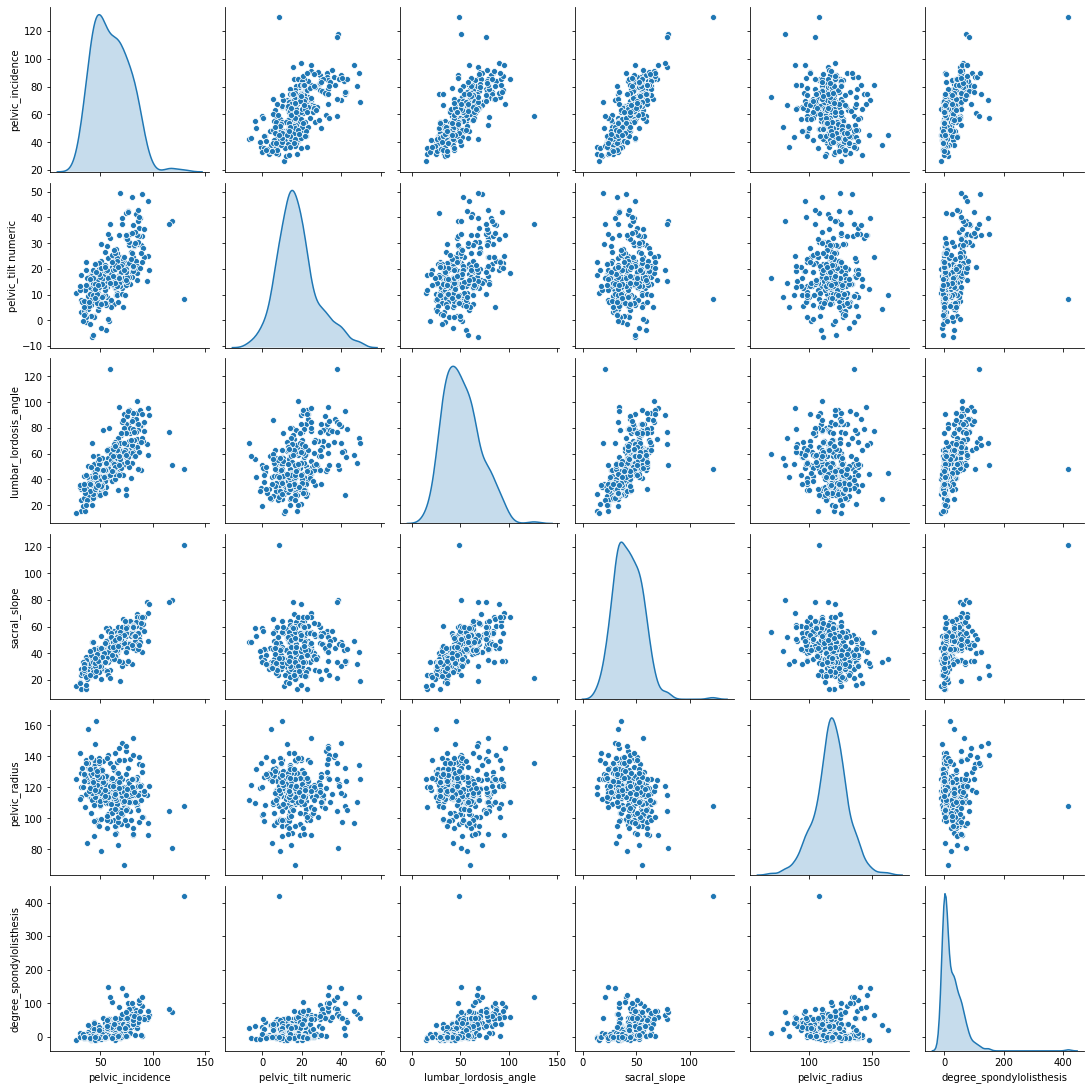

In [8]:
import seaborn as s
s.pairplot(d,diag_kind='kde')

In [125]:
print('all input attributes expect degree_spondylolithesis are almost normally distributed and degree_spondylolithesis is highly skewed')

all input attributes expect degree_spondylolithesis are almost normally distributed and degree_spondylolithesis is highly skewed


In [71]:
d.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
clas                         object
dtype: object

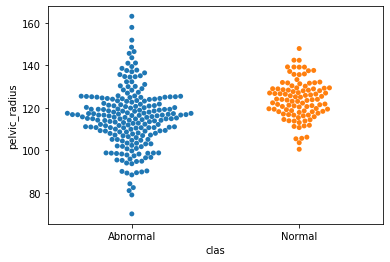

In [72]:
s.swarmplot(x='clas',y='pelvic_radius',data=d)

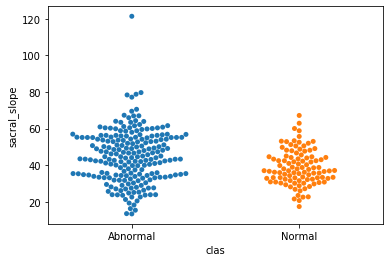

In [73]:
s.swarmplot(x='clas',y='sacral_slope',data=d)

# Encode the Class variable to integer.

In [56]:
d['clas']=[1 if i=='Abnormal' else 0 for i in d['clas']]

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [57]:
x=d.drop(columns='clas',axis=1)

In [58]:
y=d['clas'].values

# Normalize your Data (X) to get values between 0 to 1.

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
st=StandardScaler()

In [61]:
x=st.fit_transform(x)

# Split the dat as train and test with a ratio of 70:30.

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
xt,xte,yt,yte=train_test_split(x,y,test_size=.3,random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
m=KNeighborsClassifier()

In [66]:
m.fit(xt,yt)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
pr=m.predict(xte)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [68]:
m.score(xte,yte)

0.7741935483870968

In [69]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo.fit(xt,yt)
lo.score(xte,yte)

0.8709677419354839

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [70]:
ma=0
t=[]
for i in range(1,218):
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(xt,yt)
    t.append(m.score(xte,yte))
    if m.score(xte,yte)>ma:
        ma=m.score(xte,yte)
        k=i
k

37

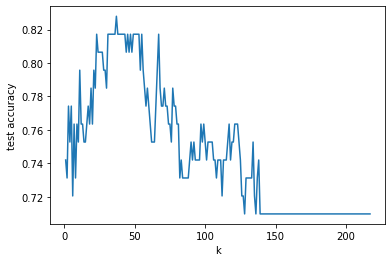

In [71]:
import matplotlib.pyplot as pl
import numpy as n
pl.plot(n.arange(1,218),t)
pl.xlabel('k')
pl.ylabel('test accuracy')
pl.show()

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [50]:
d=p.read_csv('3Classdata.csv')
d.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [28]:
d.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [118]:
d.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
clas                        0
dtype: int64

In [119]:
print('no missing values')

no missing values


In [51]:
d.rename(columns={'class':'clas'},inplace=True)

In [38]:
d.clas.unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

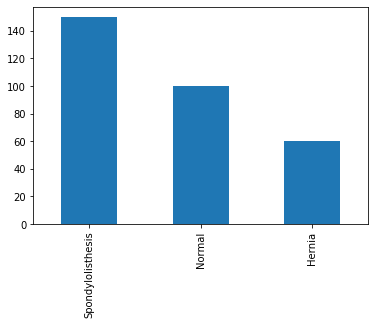

In [52]:
import matplotlib.pyplot as pl
d['clas'].value_counts().plot(kind='bar')
pl.show()

In [126]:
print('hernia class is under represented,spondylolisthesis class is over represented')

hernia class is under represented,spondylolisthesis class is over represented


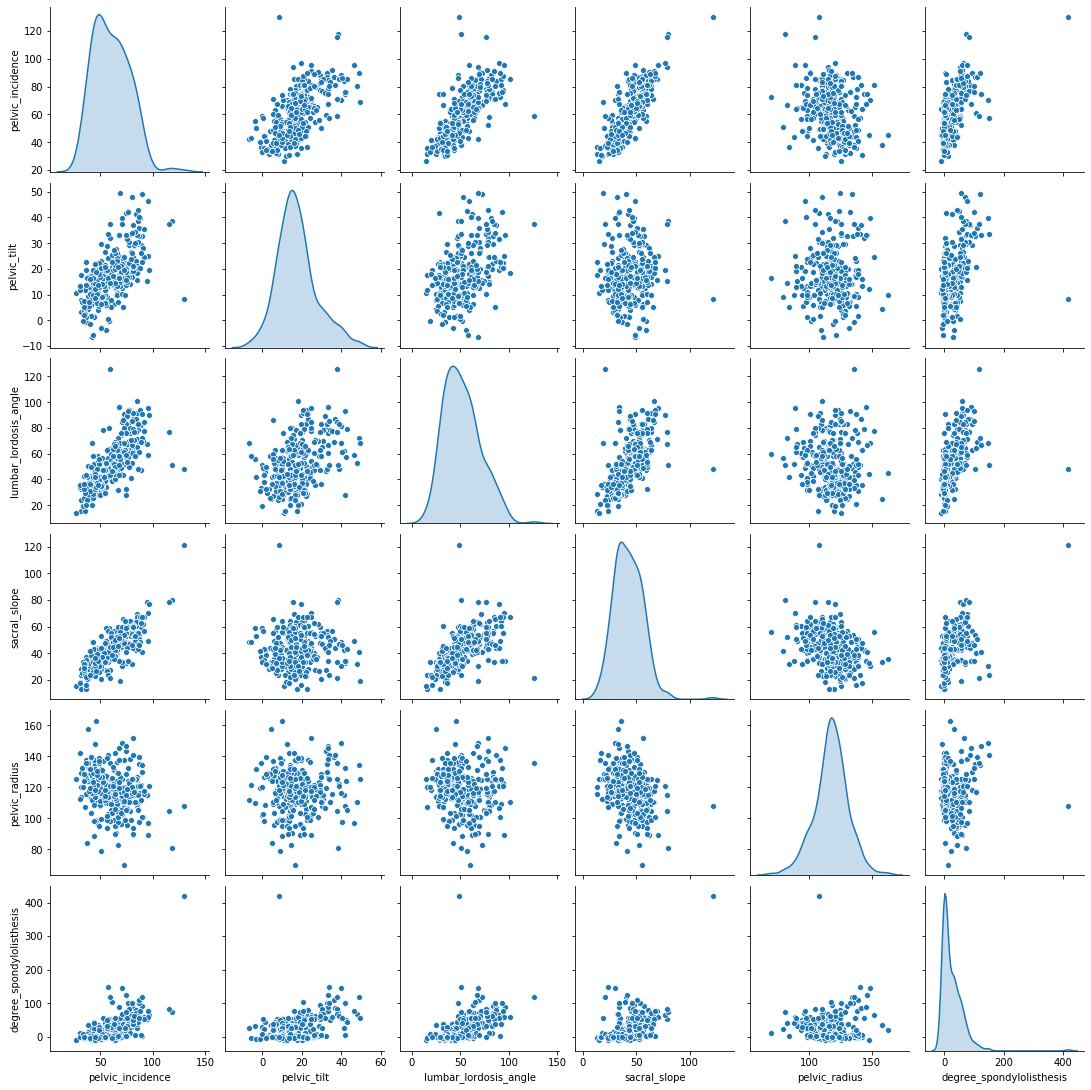

In [35]:
s.pairplot(d,diag_kind='kde')

In [127]:
print('all input attributes expect degree_spondylolithesis are almost normally distributed and degree_spondylolithesis is highly skewed')

all input attributes expect degree_spondylolithesis are almost normally distributed and degree_spondylolithesis is highly skewed


In [36]:
d.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
clas                         object
dtype: object

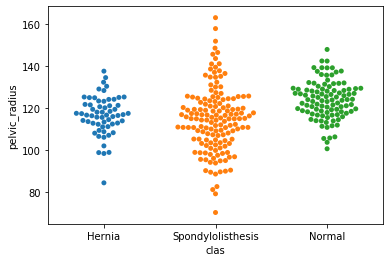

In [39]:
s.swarmplot(x='clas',y='pelvic_radius',data=d)

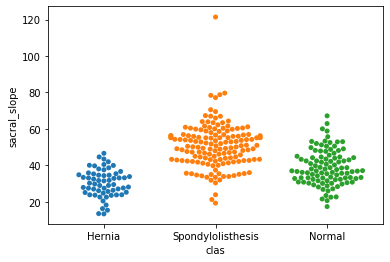

In [40]:
s.swarmplot(data=d,x='clas',y='sacral_slope')

In [39]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
y=l.fit_transform(d['clas'])

In [40]:
x=d.drop(columns='clas',axis=1)

In [41]:
x=st.fit_transform(x)

In [42]:
xt,xte,yt,yte=train_test_split(x,y,test_size=.3,random_state=1)

In [43]:
m.fit(xt,yt)
pr=m.predict(xte)

In [44]:
m.score(xte,yte)

0.7419354838709677

In [45]:
lo.fit(xt,yt)
lo.score(xte,yte)

0.8387096774193549

In [46]:
ma=0
t=[]
for i in range(1,218):
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(xt,yt)
    sc=m.score(xte,yte)
    t.append(sc)
    if sc>ma:
        ma=sc
        k=i
k

31

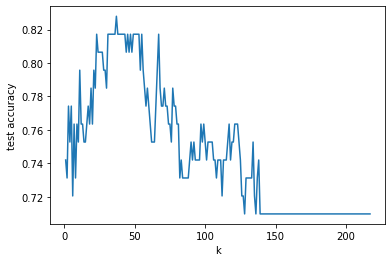

In [72]:
pl.plot(n.arange(1,218),t)
pl.xlabel('k')
pl.ylabel('test accuracy')
pl.show()